In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. symboling: -3, -2, -1, 0, 1, 2, 3.
# 2. normalized-losses: continuous from 65 to 256.
# 3. make:
# alfa-romero, audi, bmw, chevrolet, dodge, honda,
# isuzu, jaguar, mazda, mercedes-benz, mercury,
# mitsubishi, nissan, peugot, plymouth, porsche,
# renault, saab, subaru, toyota, volkswagen, volvo

# 4. fuel-type: diesel, gas.
# 5. aspiration: std, turbo.
# 6. num-of-doors: four, two.
# 7. body-style: hardtop, wagon, sedan, hatchback, convertible.
# 8. drive-wheels: 4wd, fwd, rwd.
# 9. engine-location: front, rear.
# 10. wheel-base: continuous from 86.6 120.9.
# 11. length: continuous from 141.1 to 208.1.
# 12. width: continuous from 60.3 to 72.3.
# 13. height: continuous from 47.8 to 59.8.
# 14. curb-weight: continuous from 1488 to 4066.
# 15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
# 16. num-of-cylinders: eight, five, four, six, three, twelve, two.
# 17. engine-size: continuous from 61 to 326.
# 18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
# 19. bore: continuous from 2.54 to 3.94.
# 20. stroke: continuous from 2.07 to 4.17.
# 21. compression-ratio: continuous from 7 to 23.
# 22. horsepower: continuous from 48 to 288.
# 23. peak-rpm: continuous from 4150 to 6600.
# 24. city-mpg: continuous from 13 to 49.
# 25. highway-mpg: continuous from 16 to 54.
# 26. price: continuous from 5118 to 45400

In [3]:
import csv

with open('imports-85.data.txt') as input_file:
    lines = input_file.readlines()
    newLines = []
    for line in lines:
        newLine = line.strip().split()
        newLines.append( newLine )



In [4]:
header = 'symboling normalized-losses make fuel-type aspiration num-of-doors body-style drive-wheels engine-location wheel-base length width height curb-weight engine-type num-of-cylinders engine-size fuel-system bore stroke compression-ratio horsepower peak-rpm city-mpg highway-mpg price'

header = header.split()

In [5]:
# 

In [6]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [7]:
for to_append in newLines:
    file = open('data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file, dialect='excel')
        writer.writerow(to_append[0].split(','))

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [11]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: np.nan if x=='?' else x)

In [13]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
df['symboling']=df['symboling'].astype(object)
df['bore'] = df['bore'].apply(pd.to_numeric)
df['stroke'] = df['stroke'].apply(pd.to_numeric)
df['normalized-losses'] = df['normalized-losses'].apply(pd.to_numeric)
df['peak-rpm'] = df['peak-rpm'].apply(pd.to_numeric)
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)
df['price'] = df['price'].apply(pd.to_numeric)


In [15]:
correlation = df.corr()

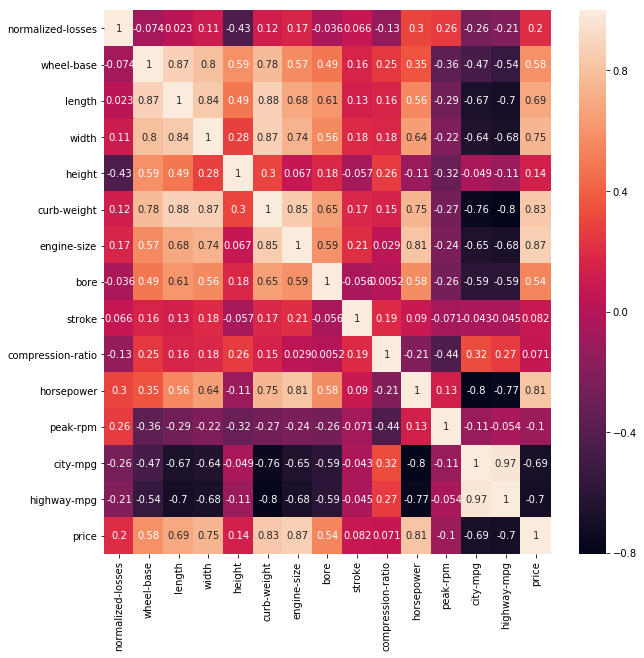

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

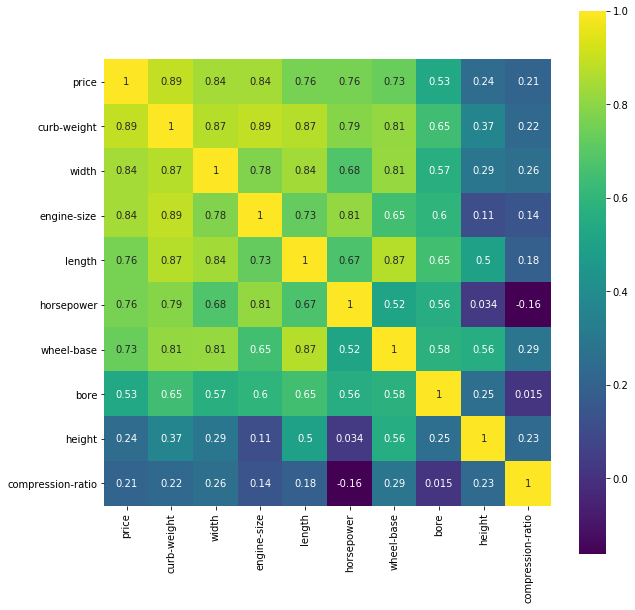

In [17]:
#cmap = sns.cm.viridis_r
correlation = df.dropna().corr()
cols = correlation.nlargest(10,'price')['price'].index
plt.figure(figsize=(10,10))
cm = np.corrcoef(df.dropna()[cols].values.T)
hm = sns.heatmap(cm,cbar = True,annot=True,square = True,yticklabels=cols.values,xticklabels=cols.values,cmap='viridis')

In [18]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

In [19]:
grouped = df.groupby('body-style')

In [20]:
grouped['num-of-doors'].value_counts()

body-style   num-of-doors
convertible  two              6
hardtop      two              8
hatchback    two             60
             four            10
sedan        four            79
             two             15
wagon        four            25
Name: num-of-doors, dtype: int64

In [21]:
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [22]:
for i in range(0,len(df)):
    if pd.isnull(df.loc[i,'num-of-doors']):
        df.loc[i,'num-of-doors'] = grouped.get_group(df.loc[i,'body-style'])['num-of-doors'].value_counts().index[0]


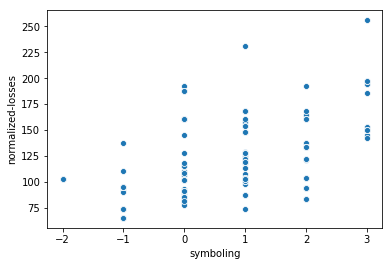

In [23]:
sns.scatterplot(x=df['symboling'],y=df['normalized-losses'])

In [24]:
grouped = df.groupby('symboling')

In [25]:
grouped['normalized-losses'].mean()

symboling
-2    103.000000
-1     85.600000
 0    113.166667
 1    128.574468
 2    125.689655
 3    168.647059
Name: normalized-losses, dtype: float64

In [26]:
df['normalized-losses'] = df.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(round(x.mean(),1)))

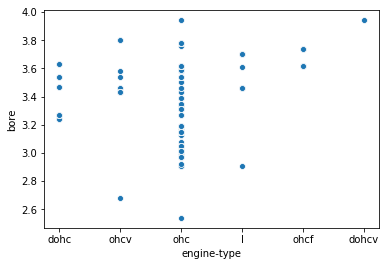

In [27]:
sns.scatterplot(x=df['engine-type'],y=df['bore'])

In [28]:
grouped = df.groupby('engine-type')

In [29]:
grouped['bore'].mean()

engine-type
dohc     3.403333
dohcv    3.940000
l        3.526667
ohc      3.260946
ohcf     3.644000
ohcv     3.453846
rotor         NaN
Name: bore, dtype: float64

In [30]:
df[df['engine-type']=='rotor']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [31]:
df['bore'] = df['bore'].fillna(round(df['bore'].mean(),2))
df['stroke'] = df['stroke'].fillna(round(df['stroke'].mean(),2))

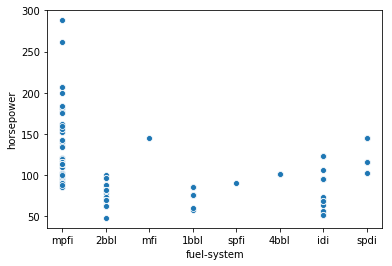

In [32]:
sns.scatterplot(x=df['fuel-system'],y=df['horsepower'])

In [33]:
df['horsepower'] = df.groupby('fuel-system')['horsepower'].transform(lambda x: x.fillna(round(x.mean(),1)))

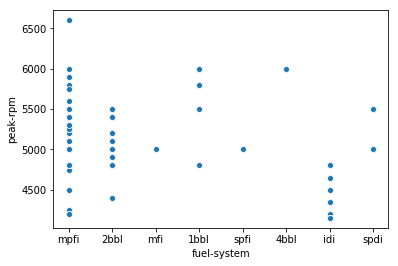

In [34]:
sns.scatterplot(x=df['fuel-system'],y=df['peak-rpm'])

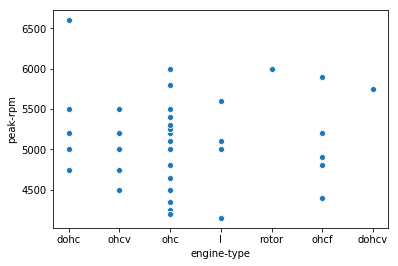

In [35]:
sns.scatterplot(x=df['engine-type'],y=df['peak-rpm'])

In [36]:
df[df['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,113.2,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,131.9,NaN,23,31,9295.0
131,2,125.7,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,131.9,NaN,23,31,9895.0


In [37]:
df['peak-rpm'] = df.groupby('fuel-system')['peak-rpm'].transform(lambda x: x.fillna(round(x.mean(),1)))